In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def is_sorted(data):
    """
    check whether list is sorted
    """
    return all([d_1 <= d2 for d_1, d2 in zip(data, data[1:])])

assert is_sorted([1,2,3,4])
assert not is_sorted([4,3,2,1])
assert not is_sorted([1,3,2,4])

def swap(data, i, j):
    """
    swap two values in data list
    """
    data[i], data[j] = data[j], data[i]

l = [1,2,3]
swap(l, 0, 2)
assert l == [3,2,1]

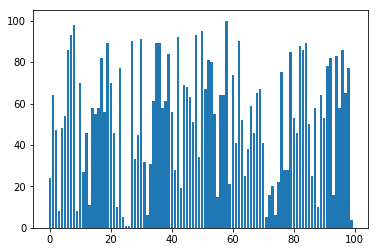

In [3]:
random.seed('sorting')
data = list(map(lambda _: random.randint(1, 100), range(100)))

plt.bar(range(len(data)), data);

# insertion sort
https://en.wikipedia.org/wiki/Insertion_sort
- complexity $O(N^{2})$

pseudocode
```
i ← 1
while i < length(A)
    j ← i
    while j > 0 and A[j-1] > A[j]
        swap A[j] and A[j-1]
        j ← j - 1
    end while
    i ← i + 1
end while
```

In [4]:
def insertion_sort_straightway(data):
    # because we mutate list we are going to clone input list
    data = data[:]
    
    i = 1
    while i < len(data):
        j = i
        while j > 0 and data[j-1] > data[j]:
            swap(data, j, j-1)
            j = j - 1
        i = i + 1
    return data

res = insertion_sort_straightway(data)
assert res is not data
assert is_sorted(res)

print('passed:')
print(data)
print()
print('result:')
print(res)

passed:
[24, 64, 47, 8, 48, 54, 86, 93, 98, 8, 70, 27, 46, 11, 58, 55, 58, 82, 56, 89, 70, 46, 10, 77, 5, 1, 1, 90, 33, 45, 91, 32, 6, 31, 61, 89, 89, 58, 61, 84, 56, 28, 92, 19, 69, 68, 63, 51, 93, 34, 95, 67, 81, 80, 55, 15, 64, 64, 100, 21, 74, 41, 90, 52, 25, 38, 59, 46, 65, 67, 41, 5, 16, 20, 6, 22, 75, 28, 28, 85, 53, 46, 88, 86, 89, 50, 25, 58, 10, 64, 53, 78, 82, 16, 83, 58, 86, 65, 77, 4]

result:
[1, 1, 4, 5, 5, 6, 6, 8, 8, 10, 10, 11, 15, 16, 16, 19, 20, 21, 22, 24, 25, 25, 27, 28, 28, 28, 31, 32, 33, 34, 38, 41, 41, 45, 46, 46, 46, 46, 47, 48, 50, 51, 52, 53, 53, 54, 55, 55, 56, 56, 58, 58, 58, 58, 58, 59, 61, 61, 63, 64, 64, 64, 64, 65, 65, 67, 67, 68, 69, 70, 70, 74, 75, 77, 77, 78, 80, 81, 82, 82, 83, 84, 85, 86, 86, 86, 88, 89, 89, 89, 89, 90, 90, 91, 92, 93, 93, 95, 98, 100]


In [5]:
def insertion_sort_pythonic(data):
    # because we mutate list we are going to clone input list
    data = data[:]
    
    for i in range(1, len(data)):
        for j in reversed(range(i + 1)):
            if data[j-1] <= data[j]:
                break
            swap(data, j, j-1)
    return data

print('passed:')
print(data)

res = insertion_sort_pythonic(data)
assert res is not data
print()
print('result:')
print(res)
assert is_sorted(res)



passed:
[24, 64, 47, 8, 48, 54, 86, 93, 98, 8, 70, 27, 46, 11, 58, 55, 58, 82, 56, 89, 70, 46, 10, 77, 5, 1, 1, 90, 33, 45, 91, 32, 6, 31, 61, 89, 89, 58, 61, 84, 56, 28, 92, 19, 69, 68, 63, 51, 93, 34, 95, 67, 81, 80, 55, 15, 64, 64, 100, 21, 74, 41, 90, 52, 25, 38, 59, 46, 65, 67, 41, 5, 16, 20, 6, 22, 75, 28, 28, 85, 53, 46, 88, 86, 89, 50, 25, 58, 10, 64, 53, 78, 82, 16, 83, 58, 86, 65, 77, 4]

result:
[1, 1, 4, 5, 5, 6, 6, 8, 8, 10, 10, 11, 15, 16, 16, 19, 20, 21, 22, 24, 25, 25, 27, 28, 28, 28, 31, 32, 33, 34, 38, 41, 41, 45, 46, 46, 46, 46, 47, 48, 50, 51, 52, 53, 53, 54, 55, 55, 56, 56, 58, 58, 58, 58, 58, 59, 61, 61, 63, 64, 64, 64, 64, 65, 65, 67, 67, 68, 69, 70, 70, 74, 75, 77, 77, 78, 80, 81, 82, 82, 83, 84, 85, 86, 86, 86, 88, 89, 89, 89, 89, 90, 90, 91, 92, 93, 93, 95, 98, 100]


# Selection Sorting
https://en.wikipedia.org/wiki/Selection_sort
- complexity $O(N^{2})$

```
/* a[0] to a[n-1] is the array to sort */
int i,j;
int n;

/* advance the position through the entire array */
/*   (could do j < n-1 because single element is also min element) */
for (j = 0; j < n-1; j++)
{
    /* find the min element in the unsorted a[j .. n-1] */

    /* assume the min is the first element */
    int iMin = j;
    /* test against elements after j to find the smallest */
    for (i = j+1; i < n; i++)
    {
        /* if this element is less, then it is the new minimum */
        if (a[i] < a[iMin])
        {
            /* found new minimum; remember its index */
            iMin = i;
        }
    }

    if (iMin != j) 
    {
        swap(a[j], a[iMin]);
    }
}
```

In [7]:
def selection_sort_straightway(data):
    # because we mutate list we are going to clone input list
    data = data[:]
    n = len(data)
    for j in range(0, n - 1):
        i_min = j
        for i in range(j+1, n):
            if data[i] < a[i_min]:
                i_min = i
        
        if i_min != j:
            swap(data, j, i_min)
    
    return data

print('passed:')
print(data)

res = selection_sort_straightway(data)
assert res is not data

print()
print('result:')
print(res)
assert is_sorted(res)


passed:
[24, 64, 47, 8, 48, 54, 86, 93, 98, 8, 70, 27, 46, 11, 58, 55, 58, 82, 56, 89, 70, 46, 10, 77, 5, 1, 1, 90, 33, 45, 91, 32, 6, 31, 61, 89, 89, 58, 61, 84, 56, 28, 92, 19, 69, 68, 63, 51, 93, 34, 95, 67, 81, 80, 55, 15, 64, 64, 100, 21, 74, 41, 90, 52, 25, 38, 59, 46, 65, 67, 41, 5, 16, 20, 6, 22, 75, 28, 28, 85, 53, 46, 88, 86, 89, 50, 25, 58, 10, 64, 53, 78, 82, 16, 83, 58, 86, 65, 77, 4]

result:
[24, 64, 47, 8, 48, 54, 86, 93, 98, 8, 70, 27, 46, 11, 58, 55, 58, 82, 56, 89, 70, 46, 10, 77, 5, 1, 1, 90, 33, 45, 91, 32, 6, 31, 61, 89, 89, 58, 61, 84, 56, 28, 92, 19, 69, 68, 63, 51, 93, 34, 95, 67, 81, 80, 55, 15, 64, 64, 100, 21, 74, 41, 90, 52, 25, 38, 59, 46, 65, 67, 41, 5, 16, 20, 6, 22, 75, 28, 28, 85, 53, 46, 88, 86, 89, 50, 25, 58, 10, 64, 53, 78, 82, 16, 83, 58, 86, 65, 77, 4]


AssertionError: 